In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/Bank_Performance/Bank_Dataset.csv')
data.head()

,Company name,Year,ROA,ROE,Audit quality,Political Connection,Liquidity ratio,Net interest margin,Bank Size,Bank age,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,City Bank,2021,0.0093,0.141,0,1,2.1,0.03,27,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,City Bank,2020,0.0129,0.168,0,1,2.2,0.03,27,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,City Bank,2019,0.0112,0.148,0,1,2.5,0.02,27,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City Bank,2018,0.0074,0.107,0,1,2.8,0.03,27,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UCBL bank,2021,0.0007,0.007,0,0,2.7,0.00,27,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = data.drop(columns=['Company name','Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22'])
data.to_csv('/content/drive/MyDrive/Bank_Performance/Bank_Dataset1.csv', index=False)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Bank_Performance/Bank_Dataset1.csv')
data.head()

,Year,ROA,ROE,Audit quality,Political Connection,Liquidity ratio,Net interest margin,Bank Size,Bank age
0,2021,0.0093,0.141,0,1,2.1,0.03,27,38
1,2020,0.0129,0.168,0,1,2.2,0.03,27,37
2,2019,0.0112,0.148,0,1,2.5,0.02,27,36
3,2018,0.0074,0.107,0,1,2.8,0.03,27,35
4,2021,0.0007,0.007,0,0,2.7,0.00,27,38


In [ ]:
X = data.drop(['ROA'], axis=1)
y = data['ROA']

# Display the modified feature dataset
print(X)

# Display the target dataset
print(y)

     Year     ROE  Audit quality  Political Connection  Liquidity ratio  \
0     2021  0.141              0                     1              2.1   
1     2020  0.168              0                     1              2.2   
2     2019  0.148              0                     1              2.5   
3     2018  0.107              0                     1              2.8   
4     2021  0.007              0                     0              2.7   
..     ...    ...            ...                   ...              ...   
115   2018  0.088              0                     0              2.7   
116   2021  0.259              1                     0              2.3   
117   2020  0.130              1                     0              2.5   
118   2019  0.262              1                     0              2.8   
119   2018  0.250              1                     0              3.1   

     Net interest margin  Bank Size  Bank age   
0                   0.03         27         38  
1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = data.drop('ROA', axis=1)
y = data['ROA']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Standardize features for Ridge/Lasso
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

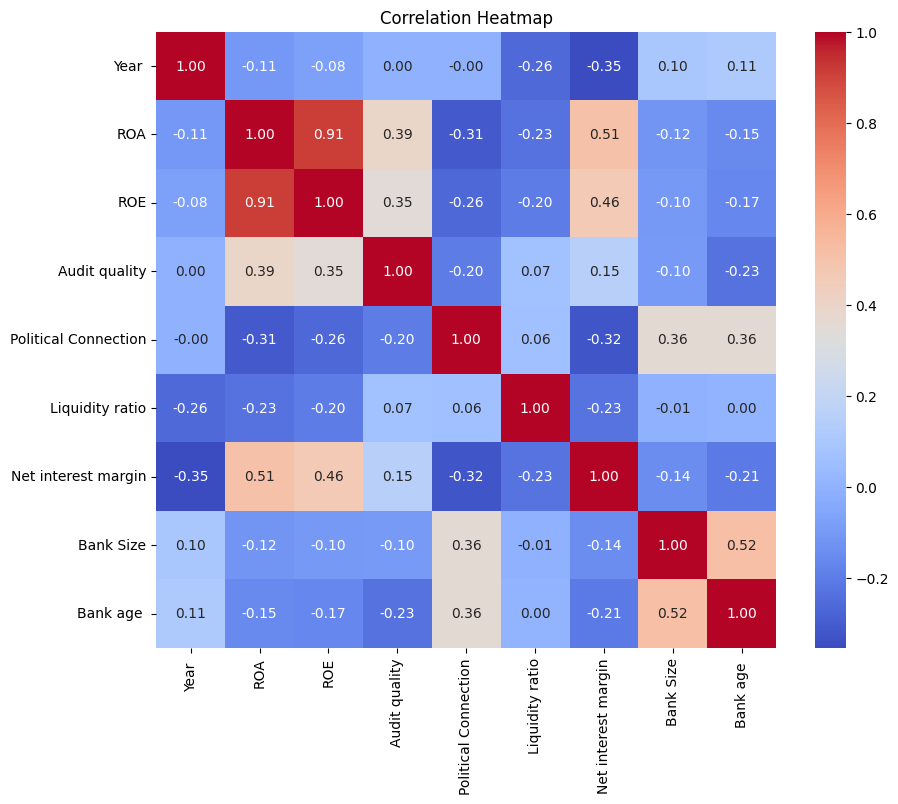

In [ ]:
# Correlation Heatmap
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

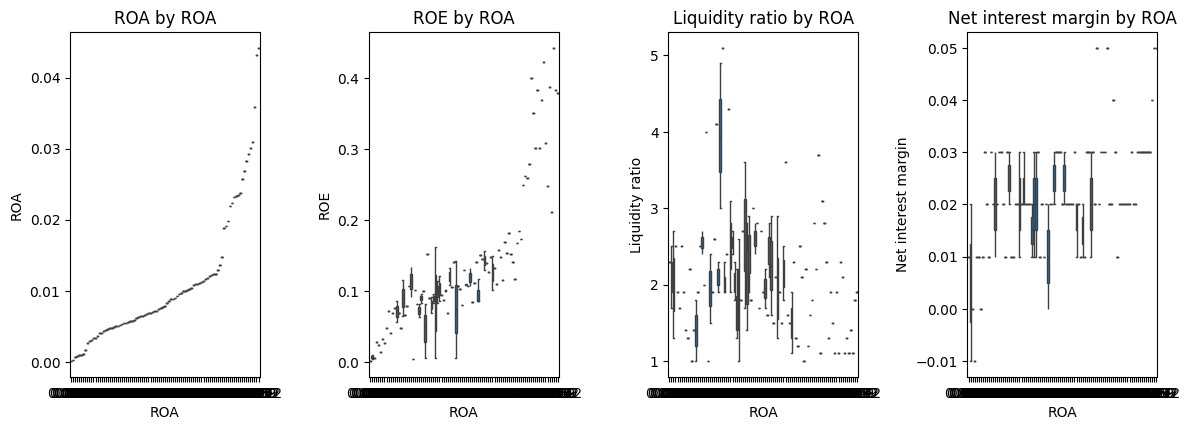

In [ ]:
# Boxplots for numerical features
numerical_features = data.select_dtypes(include=['float64']).columns
num_features_count = len(numerical_features)
num_subplots = min(num_features_count, 8)  # Adjusted to ensure maximum 8 subplots

import matplotlib.pyplot as plt # Import matplotlib for plotting

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 4, i)
    # Changed '=ROA' to 'ROA'
    sns.boxplot(x='ROA', y=feature, data=data)
    plt.title(f'{feature} by ROA')
    if i == num_subplots:  # Break loop after 8 subplots
        break

plt.tight_layout()
plt.show()

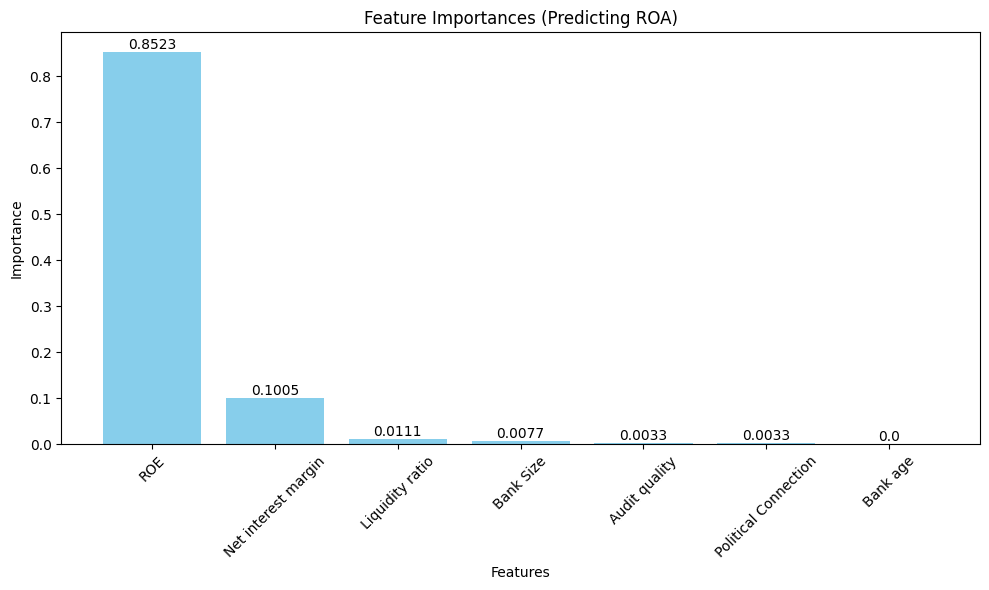

In [ ]:


# ✅ Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# ✅ Extract feature importances
importances = model.feature_importances_
feature_names = X.columns

# ✅ Optionally select a subset of features (or use all)
# If you only want specific features, list them here:
selected_features = ['ROE', 'Audit quality', 'Political Connection', 'Liquidity ratio',
                     'Net interest margin', 'Bank Size', 'Bank age']  # change this list as needed

# Extract importances
selected_importances = []
for feature in selected_features:
    if feature in feature_names:
        feature_index = np.where(feature_names == feature)[0][0]
        selected_importances.append(importances[feature_index])
    else:
        selected_importances.append(0)

# ✅ Create DataFrame
selected_feature_importances = pd.DataFrame({
    'Feature': selected_features,
    'Importance': selected_importances
}).sort_values('Importance', ascending=False)

# ✅ Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Predicting ROA)")
bars = plt.bar(selected_feature_importances['Feature'], selected_feature_importances['Importance'], color='skyblue')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()

# Add values to bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 4), ha='center', va='bottom')

plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # Note: No need to scale for Random Forest

# Predict and evaluate
y_pred_rf = rf.predict(X_test)

print("Random Forest Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))


Random Forest Regression:
MSE: 5.269800916666637e-06
R²: 0.9173358934088608


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train KNN Regressor (with k=5)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)  # ✅ Scaling is important for KNN

# Predict and evaluate
y_pred_knn = knn.predict(X_test_scaled)

print("K-Nearest Neighbors Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_knn))
print("R²:", r2_score(y_test, y_pred_knn))


K-Nearest Neighbors Regression:
MSE: 1.5949416666666667e-05
R²: 0.7498113685414525


# Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error
import numpy as np

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # No scaling needed

# Predict and evaluate
y_pred_rf = rf.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

# RMSLE requires non-negative values
y_pred_rf_clipped = np.clip(y_pred_rf, a_min=1e-10, a_max=None)
y_test_clipped = np.clip(y_test, a_min=1e-10, a_max=None)
rmsle = np.sqrt(mean_squared_log_error(y_test_clipped, y_pred_rf_clipped))

mape = mean_absolute_percentage_error(y_test, y_pred_rf)

# Print results
print("Random Forest Regression:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("RMSLE:", rmsle)
print("MAPE:", mape)
print("R²:", r2)


Random Forest Regression:
MSE: 5.269800916666637e-06
RMSE: 0.0022956046952092245
MAE: 0.0016929999999999977
RMSLE: 0.0022550806193409527
MAPE: 0.5871095956012801
R²: 0.9173358934088608


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Scale the features for Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_lr = lr.predict(X_test_scaled)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

# RMSLE requires all predictions and targets to be >= 0
# Clip negative values to small positive number (only if needed)
y_pred_lr_clipped = np.clip(y_pred_lr, a_min=1e-10, a_max=None)
y_test_clipped = np.clip(y_test, a_min=1e-10, a_max=None)
rmsle = np.sqrt(mean_squared_log_error(y_test_clipped, y_pred_lr_clipped))

mape = mean_absolute_percentage_error(y_test, y_pred_lr)

# Print results
print("Linear Regression:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("RMSLE:", rmsle)
print("MAPE:", mape)
print("R²:", r2)


Linear Regression:
MSE: 1.4033186684213303e-05
RMSE: 0.0037460895189801997
MAE: 0.0026416466928823146
RMSLE: 0.0036308762532039954
MAPE: 0.8166204297106301
R²: 0.7798700827182412


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Scale features (required for Ridge regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Ridge Regressor
ridge = Ridge(alpha=1.0)  # You can tune alpha as needed
ridge.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_ridge = ridge.predict(X_test_scaled)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)

# RMSLE requires non-negative values
y_pred_ridge_clipped = np.clip(y_pred_ridge, a_min=1e-10, a_max=None)
y_test_clipped = np.clip(y_test, a_min=1e-10, a_max=None)
rmsle = np.sqrt(mean_squared_log_error(y_test_clipped, y_pred_ridge_clipped))

mape = mean_absolute_percentage_error(y_test, y_pred_ridge)

# Print results
print("Ridge Regression:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("RMSLE:", rmsle)
print("MAPE:", mape)
print("R²:", r2)


Ridge Regression:
MSE: 1.4001362447147025e-05
RMSE: 0.0037418394470029076
MAE: 0.002624441446808849
RMSLE: 0.003625372519041172
MAPE: 0.821331490907309
R²: 0.7803692898356691


In [ ]:
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Scale features (important for HuberRegressor)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Huber Regressor
huber = HuberRegressor()
huber.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_huber = huber.predict(X_test_scaled)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred_huber)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_huber)
r2 = r2_score(y_test, y_pred_huber)

# RMSLE requires non-negative values
y_pred_huber_clipped = np.clip(y_pred_huber, a_min=1e-10, a_max=None)
y_test_clipped = np.clip(y_test, a_min=1e-10, a_max=None)
rmsle = np.sqrt(mean_squared_log_error(y_test_clipped, y_pred_huber_clipped))

mape = mean_absolute_percentage_error(y_test, y_pred_huber)

# Print results
print("Huber Regression:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("RMSLE:", rmsle)
print("MAPE:", mape)
print("R²:", r2)


Huber Regression:
MSE: 1.6017207439441742e-05
RMSE: 0.0040021503519285405
MAE: 0.002269740840413776
RMSLE: 0.0039037757068924052
MAPE: 0.3958549282701996
R²: 0.7487479766306022


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error
import numpy as np

# Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)  # No scaling needed for tree-based models

# Predict and evaluate
y_pred_gbr = gbr.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred_gbr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)

# RMSLE requires non-negative values
y_pred_gbr_clipped = np.clip(y_pred_gbr, a_min=1e-10, a_max=None)
y_test_clipped = np.clip(y_test, a_min=1e-10, a_max=None)
rmsle = np.sqrt(mean_squared_log_error(y_test_clipped, y_pred_gbr_clipped))

mape = mean_absolute_percentage_error(y_test, y_pred_gbr)

# Print results
print("Gradient Boosting Regression:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("RMSLE:", rmsle)
print("MAPE:", mape)
print("R²:", r2)


Gradient Boosting Regression:
MSE: 1.3934479252710541e-06
RMSE: 0.001180443952617427
MAE: 0.0009393703728665818
RMSLE: 0.0011630808433312156
MAPE: 0.16044400792400826
R²: 0.9716860004770776


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error
import numpy as np

# Train Extra Trees Regressor
etr = ExtraTreesRegressor(n_estimators=100, random_state=42)
etr.fit(X_train, y_train)  # No scaling needed for tree-based models

# Predict and evaluate
y_pred_etr = etr.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred_etr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_etr)
r2 = r2_score(y_test, y_pred_etr)

# RMSLE requires non-negative values
y_pred_etr_clipped = np.clip(y_pred_etr, a_min=1e-10, a_max=None)
y_test_clipped = np.clip(y_test, a_min=1e-10, a_max=None)
rmsle = np.sqrt(mean_squared_log_error(y_test_clipped, y_pred_etr_clipped))

mape = mean_absolute_percentage_error(y_test, y_pred_etr)

# Print results
print("Extra Trees Regression:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("RMSLE:", rmsle)
print("MAPE:", mape)
print("R²:", r2)


Extra Trees Regression:
MSE: 1.5804398333333252e-06
RMSE: 0.0012571554531295346
MAE: 0.0009566666666666655
RMSLE: 0.0012357958847154854
MAPE: 0.17098880545707762
R²: 0.9678864406229585


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error
import numpy as np

# Train Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)  # No scaling needed for tree models

# Predict and evaluate
y_pred_dt = dt.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)

# RMSLE requires non-negative values
y_pred_dt_clipped = np.clip(y_pred_dt, a_min=1e-10, a_max=None)
y_test_clipped = np.clip(y_test, a_min=1e-10, a_max=None)
rmsle = np.sqrt(mean_squared_log_error(y_test_clipped, y_pred_dt_clipped))

mape = mean_absolute_percentage_error(y_test, y_pred_dt)

# Print results
print("Decision Tree Regression:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("RMSLE:", rmsle)
print("MAPE:", mape)
print("R²:", r2)


Decision Tree Regression:
MSE: 2.3208333333333333e-06
RMSE: 0.0015234281516807195
MAE: 0.0009916666666666665
RMSLE: 0.0014917127825849771
MAPE: 0.16847492210269088
R²: 0.9528421028866221


In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error
import numpy as np

# Base estimator for bagging (commonly decision tree)
base_estimator = DecisionTreeRegressor(random_state=42)

# Train Bagging Regressor
# Changed base_estimator to estimator for compatibility with newer scikit-learn versions
bagging = BaggingRegressor(estimator=base_estimator, n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)  # No scaling needed for tree-based models

# Predict and evaluate
y_pred_bagging = bagging.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred_bagging)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_bagging)
r2 = r2_score(y_test, y_pred_bagging)

# RMSLE requires non-negative values
y_pred_bagging_clipped = np.clip(y_pred_bagging, a_min=1e-10, a_max=None)
y_test_clipped = np.clip(y_test, a_min=1e-10, a_max=None)
rmsle = np.sqrt(mean_squared_log_error(y_test_clipped, y_pred_bagging_clipped))

mape = mean_absolute_percentage_error(y_test, y_pred_bagging)

# Print results
print("Bagging Regression:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("RMSLE:", rmsle)
print("MAPE:", mape)
print("R²:", r2)

Bagging Regression:
MSE: 2.8338270833333265e-06
RMSE: 0.0016833974822760447
MAE: 0.0013475833333333308
RMSLE: 0.001665312280671206
MAPE: 0.2162257256815929
R²: 0.9424183873466699


#Ensemble

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error
import numpy as np

# Define base regressors
estimators = [
    ('gbr', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('etr', ExtraTreesRegressor(n_estimators=100, random_state=42))
]

# Define stacking regressor with Linear Regression as meta-model
stack = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

# Train stacking model
stack.fit(X_train, y_train)

# Predict
y_pred_stack = stack.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred_stack)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_stack)
r2 = r2_score(y_test, y_pred_stack)

y_pred_stack_clipped = np.clip(y_pred_stack, a_min=1e-10, a_max=None)
y_test_clipped = np.clip(y_test, a_min=1e-10, a_max=None)
rmsle = np.sqrt(mean_squared_log_error(y_test_clipped, y_pred_stack_clipped))

mape = mean_absolute_percentage_error(y_test, y_pred_stack)

print("Stacking Regressor:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("RMSLE:", rmsle)
print("MAPE:", mape)
print("R²:", r2)


Stacking Regressor:
MSE: 5.413148046926862e-07
RMSE: 0.0007357409902218893
MAE: 0.0005906936011864508
RMSLE: 0.00073000354697134
MAPE: 0.1014655979847373
R²: 0.9890008181548383


In [ ]:
from sklearn.ensemble import VotingRegressor

# Define voting regressor with the same base models
voting = VotingRegressor(estimators=estimators)

# Train voting model
voting.fit(X_train, y_train)

# Predict
y_pred_voting = voting.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred_voting)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_voting)
r2 = r2_score(y_test, y_pred_voting)

y_pred_voting_clipped = np.clip(y_pred_voting, a_min=1e-10, a_max=None)
y_test_clipped = np.clip(y_test, a_min=1e-10, a_max=None)
rmsle = np.sqrt(mean_squared_log_error(y_test_clipped, y_pred_voting_clipped))

mape = mean_absolute_percentage_error(y_test, y_pred_voting)

print("Voting Regressor:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("RMSLE:", rmsle)
print("MAPE:", mape)
print("R²:", r2)


Voting Regressor:
MSE: 1.4317978027901935e-06
RMSE: 0.0011965775373080482
MAE: 0.0008917918547612249
RMSLE: 0.0011771124721140591
MAPE: 0.13252654014938722
R²: 0.9709067546982518


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ No need for scaling for Random Forest

# Hyperparameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create model and perform GridSearchCV
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model and prediction
best_rf_model = grid_search.best_estimator_
best_rf_pred = best_rf_model.predict(X_test)

# Evaluation metrics
best_mae = mean_absolute_error(y_test, best_rf_pred)
best_mse = mean_squared_error(y_test, best_rf_pred)
best_rmse = np.sqrt(best_mse)
best_r2 = r2_score(y_test, best_rf_pred)

# RMSLE – only if predictions and actuals are >= 0
try:
    best_rmsle = np.sqrt(np.mean((np.log1p(best_rf_pred) - np.log1p(y_test)) ** 2))
except ValueError:
    best_rmsle = "RMSLE not applicable (negative values found)"

# MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    epsilon = 1e-10
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, epsilon))) * 100

best_mape = mean_absolute_percentage_error(y_test, best_rf_pred)

# ✅ Print results
print("📊 Best Random Forest Model after Hyperparameter Tuning:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"MAE   : {best_mae:.4f}")
print(f"MSE   : {best_mse:.4f}")
print(f"RMSE  : {best_rmse:.4f}")
print(f"R²    : {best_r2:.4f}")
print(f"RMSLE : {best_rmsle}")
print(f"MAPE  : {best_mape:.2f}%")


📊 Best Random Forest Model after Hyperparameter Tuning:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
MAE   : 0.0017
MSE   : 0.0000
RMSE  : 0.0023
R²    : 0.9175
RMSLE : 0.0022530885325208845
MAPE  : 58.51%


In [ ]:
!pip install pandas

# Graph

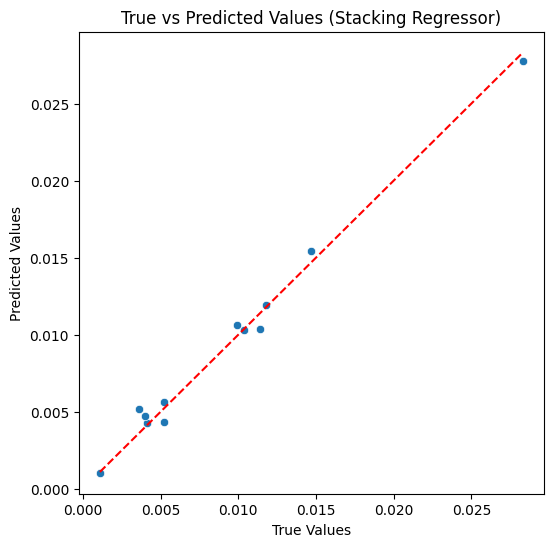

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_stack)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Stacking Regressor)')
plt.show()


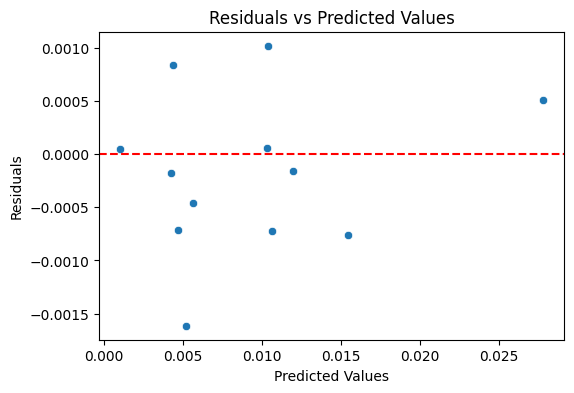

In [ ]:
residuals = y_test - y_pred_stack

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred_stack, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


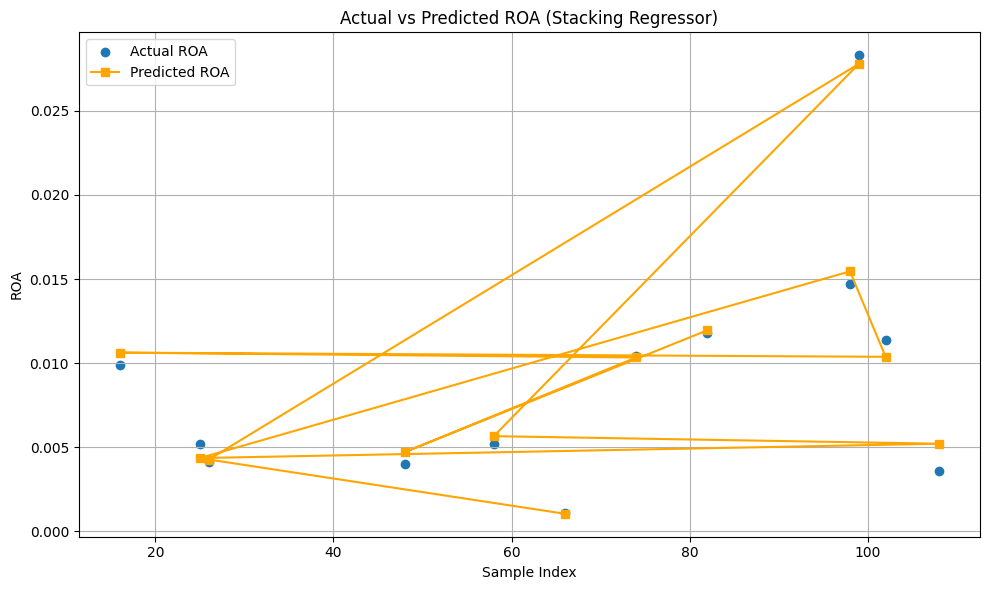

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming y_pred_stack and y_test are available from your stacking model
# If y_test is a Series with index, keep that; else use range(len(y_test)) as index

# Create DataFrame to compare actual vs predicted
roa_comparison = pd.DataFrame({
    'Actual ROA': y_test if hasattr(y_test, 'values') else y_test,
    'Predicted ROA': y_pred_stack
}, index=y_test.index if hasattr(y_test, 'index') else range(len(y_test)))

# Plot Actual vs Predicted ROA
plt.figure(figsize=(10, 6))
plt.title("Actual vs Predicted ROA (Stacking Regressor)")
plt.scatter(roa_comparison.index, roa_comparison['Actual ROA'], label='Actual ROA', marker='o')
plt.plot(roa_comparison.index, roa_comparison['Predicted ROA'], label='Predicted ROA', linestyle='-', marker='s', color='orange')
plt.xlabel("Sample Index")
plt.ylabel("ROA")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


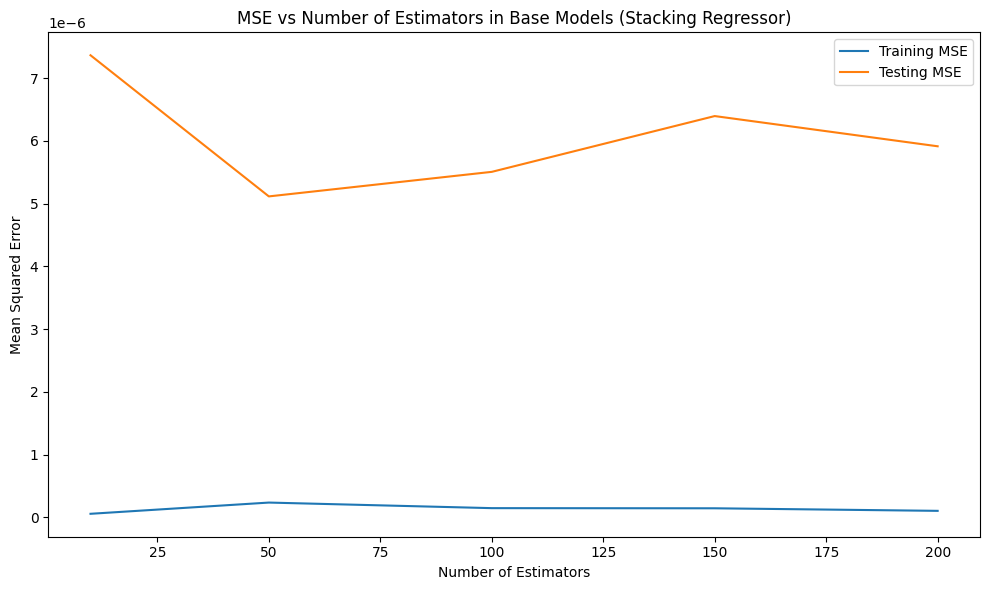

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

num_estimators = [10, 50, 100, 150, 200]

train_errors = []
test_errors = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for n in num_estimators:
    # Define base estimators with varying n_estimators
    estimators = [
        ('gbr', GradientBoostingRegressor(n_estimators=n, random_state=42)),
        ('etr', ExtraTreesRegressor(n_estimators=n, random_state=42))
    ]

    stack = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
    stack.fit(X_train, y_train)

    y_train_pred = stack.predict(X_train)
    y_test_pred = stack.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(num_estimators, train_errors, label='Training MSE')
plt.plot(num_estimators, test_errors, label='Testing MSE')
plt.title('MSE vs Number of Estimators in Base Models (Stacking Regressor)')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


#Lime

In [ ]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=d5af8f5fb84bd9c450586a08e4a68d83bb5dbdb81ba05c8cafd0349bfd528486
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


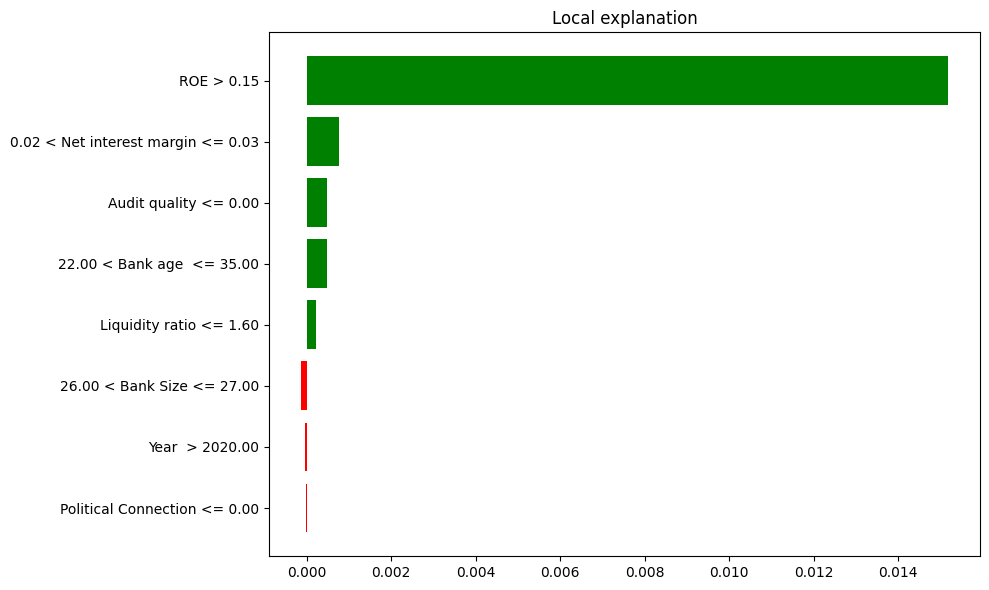

In [ ]:
import lime
import lime.lime_tabular
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# Prepare data for LIME: ensure it's numpy
X_train_np = X_train.values if hasattr(X_train, "values") else X_train
X_test_np = X_test.values if hasattr(X_test, "values") else X_test

# Train the model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Create LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_np,
    feature_names=X.columns if hasattr(X, 'columns') else [f'feature_{i}' for i in range(X_train_np.shape[1])],
    mode='regression'
)

# Choose instance to explain
i = 0

# Define prediction function to avoid warning
predict_fn = lambda x: gbr.predict(pd.DataFrame(x, columns=X.columns))

# Generate explanation
exp = explainer.explain_instance(
    data_row=X_test_np[i],
    predict_fn=predict_fn,
    num_features=10
)

# Show explanation in notebook
exp.show_in_notebook(show_table=True)

# Print textual explanation
print("LIME Explanation (Top 10 Features):")
print(exp.as_list())

# Plot with larger size
fig = exp.as_pyplot_figure()
fig.set_size_inches(10, 6)  # Increase size (width, height)
plt.tight_layout()
plt.show()

# Optional: Save figure for reports
# fig.savefig("lime_explanation_instance_0.png", dpi=300)
